<a href="https://colab.research.google.com/github/Mikepa22/Projects-IA/blob/main/classify_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>**LABORATORIO 1. Visión computacional Tradicional y ANN´s aplicadas a problemas de clasificación de imágenes**

<font color='red'>Integrantes (Máximo 3 personas):

<font color='red'>Nombres y Apellidos

<font color='red'>Codigo UAO

Las CNN's en general se consideran buenos clasificadores, sin embargo estas soluciones tienden a ser consideradas cajas negras. Una manera de comenzar a entender los procesos que se suceden al interior de sistemas de clasificación es usar técnicas tradicionales.

La base de este tipo de clasificadores es el sistema que se use para extraer características. En clase, hemos realizado un pequeño modelo haciendo uso de herramientas básicas como : SIFT (Detector/Descriptor) , VBoW y MLP.

Siga las instrucciones (<font color='red'>resaltadas en rojo </font>), las cuales además de guiarlo, generarán en suma el puntaje final obtenido para este laboratorio.

In [ ]:
#Para dar un orden al trabajo realizado, coloque aqui todas las librerias que van a ser usadas.
import numpy as np
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import random
from scipy.spatial.distance import cdist
from scipy.spatial import distance
from sklearn.cluster import KMeans
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [ ]:
# Vamos a usar el Sign Language Digits Dataset
#By Turkey Ankara Ayrancı Anadolu High School Students.

!git clone https://github.com/ardamavi/Sign-Language-Digits-Dataset.git


Cloning into 'Sign-Language-Digits-Dataset'...
remote: Enumerating objects: 2095, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2095 (delta 2), reused 0 (delta 0), pack-reused 2089
Receiving objects: 100% (2095/2095), 15.07 MiB | 18.52 MiB/s, done.
Resolving deltas: 100% (660/660), done.


In [ ]:
#Esta parte esta hecha para ustedes.
#Se les pide que intenten seguir el código y entender
#lo que se hace y el porque se hace. Que tan importante es usar pathlib en este caso?

import os
import pathlib

#creamos una variable que representa la ruta del data set,no tenemos que estar escribiendo la direccion cada que la nececitemos
sld_dir = pathlib.Path('Sign-Language-Digits-Dataset/Dataset/')

#busca en nuestra direccion todos los archivos JPG que existen
#luego lo convertimos en una lista para poder contarlos
print(len(list(sld_dir.glob('*/*.JPG'))))

2062


#<font color='red'>Punto 1 (0.5). Preprocesamiento</font>.

El pre-procesamiento de imagenes es una tarea fundamental cuando se desea que la IA trabaje correctamente.

Lea el documento que aparece en este [link](https://medium.com/spidernitt/image-preprocessing-why-is-it-necessary-8895b8b08c1d), el cual aborda este tema de una manera clara y concisa.

(a) Realice el código necesario para cumplir con la labor de pre-procesamiento del dataset dado, indicando cual o cuales técnicas utilizó y la razón que tuvo para usarlas.

(b) Realice un código que le permita mostrar nueve imagenes aleatorias seleccionadas del dataset, mostrando el antes y el despues del pre-procesamiento.


###Funciones utiliadas para el preprocesamiento y visualizacion

In [ ]:

#funcion para obtener las imagenes desde las carpetas, y cargarlas en escala de grises
def cargar_imagenes(folder):
  for foldername in os.listdir(folder):
    categoria=[]
    ruta = folder + '/' + foldername
    for filename in os.listdir(ruta):
      img = cv2.imread(ruta +'/'+ filename,cv2.IMREAD_GRAYSCALE)

      if img is not None:
        categoria.append(img)

    imagenes[foldername]=categoria

  return imagenes

#---------------------------------------------------------------------------------------
#funcion para mostrar las imagenes en pantalla
def show_images(dataset):
  i=0
  plt.figure(figsize=(15,15))
  for numero in dataset.keys():

    cantidad=len(dataset[numero])
    aleatorio=random.randint(0,cantidad) #crea un arreglo aleatorio para imprimir imagenes aleatorias por categoria
    plt.subplot(1,10,i+1)
    plt.imshow(dataset[numero][aleatorio],'gray')
    plt.gca().set_yticklabels([])
    plt.gca().set_xticklabels([])
    plt.gca().set_title('Num: '+str(numero))
    i+=1
  plt.show()

#---------------------------------------------------------------------------------------
#funcion para crear la equalizacion del histograma (preprocesamiento, normalizacion)
def hist_eq(dataset):
    dataset_norm = {}
    for key, value in dataset.items():
        x = []  # Crear una nueva lista para cada clave
        for imagen in value:
            img = cv2.equalizeHist(imagen)
            if img is not None:
                x.append(img)
        dataset_norm[key] = x
    return dataset_norm

#---------------------------------------------------------------------------------------
#funcion para aplicar un Laplaciano y detectar bordes
def Laplaciano(dataset):
  dataset_norm={}

  for key,value in dataset.items():
    x=[]
    for imagen in value:
      img=cv2.Laplacian(imagen,cv2.CV_8U)
      img = cv2.bitwise_not(img) #invierte los colores, bordes en negro fondo en blanco
      if img is not None:
        x.append(img)
    dataset_norm[key]=x
  return dataset_norm

#---------------------------------------------------------------------------------------
#Funcion para detectar numero de items por categoria en diccionarios
def detect(diccionario):
  contador=[]
  print("Determinar numero de elementos por clase:")
  for items in diccionario:
    print(f'Clase:{items} Items:{len(diccionario[items])}')
    contador.append(len(diccionario[items]))
  #detectando el numero minimo de elementos
  print(f'numero minimo de elementos: {min(contador)}')


###Desarrollo

In [ ]:
#Pegue y ejecute aquí el código para la tarea de preprocesamiento.
ruta='/content/Sign-Language-Digits-Dataset/Dataset'
imagenes={}
dataset=cargar_imagenes(ruta)

#-------------------------------------------------------------
dataset_norm=hist_eq(dataset)
dataset_norm2=Laplaciano(dataset_norm)

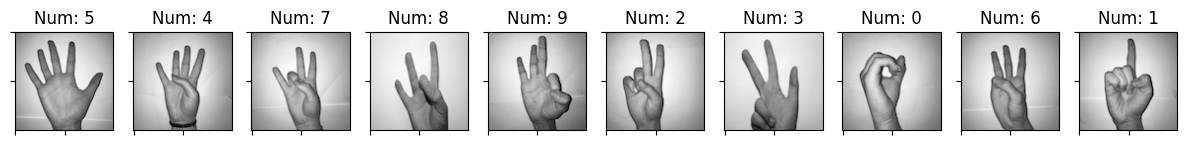

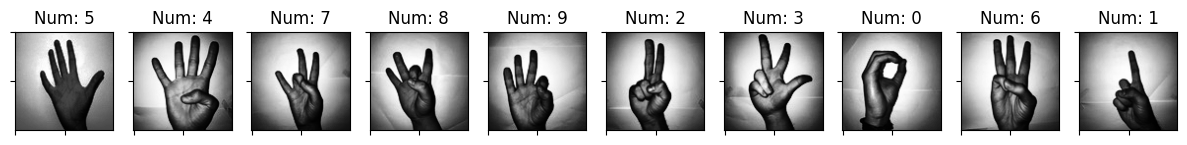

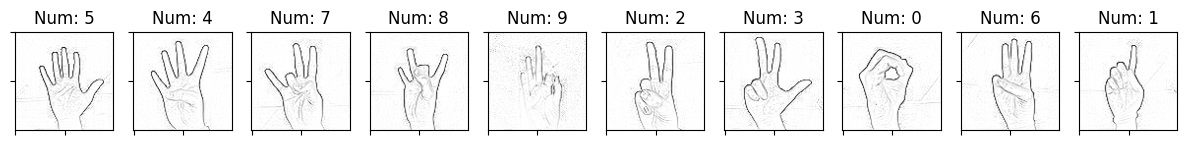

In [ ]:
#Pegue y ejecute  aquí el código para crear  el visualizador.
show_images(dataset)
show_images(dataset_norm)
show_images(dataset_norm2)

###Tratamiento de data

In [ ]:
#Detectando numero de elementos por categoria
detect(dataset_norm2)

Determinar numero de elementos por clase:
Clase:5 Items:207
Clase:8 Items:208
Clase:1 Items:206
Clase:0 Items:205
Clase:6 Items:207
Clase:4 Items:207
Clase:7 Items:206
Clase:9 Items:204
Clase:3 Items:206
Clase:2 Items:206
numero minimo de elementos: 204


In [ ]:
#Balancear el dataset, eliminar datos de cada categoria para conservar mismo numero de elementos
minimo=204
balanced_data=dataset_norm2
for items in balanced_data:
  tamaño=len(balanced_data[items])
  if tamaño>minimo:

    del balanced_data[items][minimo:tamaño]

detect(balanced_data)

Determinar numero de elementos por clase:
Clase:5 Items:204
Clase:8 Items:204
Clase:1 Items:204
Clase:0 Items:204
Clase:6 Items:204
Clase:4 Items:204
Clase:7 Items:204
Clase:9 Items:204
Clase:3 Items:204
Clase:2 Items:204
numero minimo de elementos: 204


In [ ]:
#dividir Dataset
division=143 #corresponde al 70% aprox de imagens en el dataset
Train={}
Test={}

#-Se divide la data en 70% para entrenamiento y 30% para el test

for key,value in balanced_data.items():
  m=[]
  n=[]
  for imagen in value:
    m.append(imagen)
    n.append(imagen)
  del m[division:len(n)]
  del n[0:division]
  Train[key]=m
  Test[key]=n


#<font color='red'>Punto 2 (2.0). Cree un clasificador tradicional para el dataset dado, usando SIFT como Detector/Descriptor.

(1.0) Utilice los conocimientos adquiridos en clase acerca de visión computacional tradicional: detectores/descriptores, BoVW y ANN´s para que cree, entrene y valide un CLASIFICADOR TRADICIONAL.

(0.5) ¿Cómo seleccionó el numero de palabras en su diccionario? (Lea acerca de la técnica KNN y el ELBOW METHOD, para crear una función que le permita obtener el K óptimo)

(0.5) ¿Como seleccionó o creó la estrucutra de su modelo MLP? (De una explicación clara y concisa. Tenga en cuenta dentro de su explicación dar respuesta a la selección de: numero de capas, numero de neuronas por capa, función de activación, optimizador)



###Funciones para crear el clasificador tradcional usando SIFT

In [ ]:
#extrae las features usando SIFT por categoria y por imagen

def features(imagenes):
  sift = cv2.SIFT_create()
  feat_all = []     #todas las features
  feat_category={} #features por categoria
  for key, imgs in dataset.items():
    feat_ximg=[] #extrae las featuees por cada imagen
    for img in imgs:
      kp,desc = sift.detectAndCompute(img,None)
      if desc is not None:
         feat_all.extend(list(desc))
         feat_ximg.append(list(desc))
    feat_category[key]=feat_ximg #agrega las features por imagen en cada categoria
  return (feat_all, feat_category)

def leg(mi_diccionario):
  tamaño_total=0
  for clave, lista in mi_diccionario.items():
    tamaño_total += len(lista)
  return tamaño_total

#--------------------------------------------------------------------------------
#define el K optimo a partir de la distorsion utilizando distancia euclidiana
def k_opt(lista):
  distortion=[]
  K=range(1,50)
  for item in K:
    kmeanmodel=KMeans(n_clusters=item).fit(lista)
    distortion.append(sum(np.min(cdist(lista,kmeanmodel.cluster_centers_,'euclidean'),axis=1))/len(lista))

  return distortion

#--------------------------------------------------------------------------------
# encuaentra el indice y las distancias minimas por feature y centroide
def find_idx(feat,center):
  count = 0
  ind = 0
  for i in range(len(center)):
    if (i==0):
      count = distance.euclidean(feat,center[i])
    else :
      dist=distance.euclidean(feat,center[i])
      if (dist<count):
        ind=i
        count=dist
  return ind


# -----------crear histogramas por imagenes-----------------------------------

def img_histos(bovw_feat,centers):
  dict_feat={}
  for key,value in bovw_feat.items():
    imagens=[]
    for img in value:
      histo = np.zeros(len(centers))
      for each_feat in img:
        idx = find_idx(each_feat,centers)
        histo[idx]+=1
      imagens.append(histo)
    dict_feat[key]=imagens
  return dict_feat

#--------------------------------------------------------------------------------
#prepara los datos en arreglos numpy
def preparar_datos(diccio):
  y = []
  x = []
  for key, values in diccio.items():
    for histo in values:
      x.append(histo)
      y.append(key)
  return np.array(x),np.array(y)

#--------------------------------------------------------------------------------
def clustering(k,lista):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(lista)
  diccionario = kmeans.cluster_centers_
  return diccionario

###Implementacion


In [ ]:
feat_train=features(Train)
print("Se extrajeron {} características SIFT de {} imágenes.".format(len(feat_train[0]),leg(Train)))
print("Las características SIFT se dividieron en {} categorías.".format(len(feat_train[1])))


Se extrajeron 71540 características SIFT de 1430 imágenes.
Las características SIFT se dividieron en 10 categorías.


###K optimo

para seleccionar el K optimo se utiliza el metodo del codo, que es una representacion grafica que nos permite identificar el K optimo en una operaciond e clustering. para este metodo s epuede utilizar un parametro denominado distorsion que se calcula como el promedio de las distancias al cuadrado de los respectivos clusters hasta cada punto ) se utiliza tipicamente la distancia Euclidiana= y la inercia que es la suma de los cuadrados de las distancias de cada dato a su cluster mas cercano. Para efectos practicos se decide utilizar la distorsion debido a que necesita menos poder computacional.

In [ ]:

#warnings.filterwarnings("ignore") #ignorar warnings y no imprimirlas
#distorion=k_opt(feat_train[0])

In [ ]:
# #plotea la distorsion vs el K iterado
# distorion=np.array(distorion)
# data=distorion.reshape(-1,1)
# k=range(1,50)
# plt.plot(k,data)

###Creacion del modelo

Para crear el modelo, nos hemos basado en el Modelo de reconocimiento de marcas de automobiles, cuya estructura fue aprovechada para construir los parametros necesarios en la realizacion de este laboratorio. Utilizando la herraminta GridSearch hemos creado una arreglo, de parametros en un principio con datos aleatorios en modo de exploracion, y hemos corrido el algoritmo para que determine la configuracion mas optima automaticamente de la red neuronal (solo se modificaron el tamaño de las capas, y no la cantidad ni el optimizador, debido al buen resultado con el ejercicio anterior)

In [ ]:
#Pegue y ejecute aquí su código del entrenamiento, validación de su clasificador tradicional"""

k=20
diccionario_vis = clustering(k,feat_train[0])
bovw_train = img_histos(feat_train[1],diccionario_vis)
x_train,y_train =preparar_datos(bovw_train)

#------repetir para el conjunto de test--------------------

imagenes={}
feat_test = features(Test)#[1]
bovw_test=img_histos(feat_test[1],diccionario_vis)
x_test,y_test=preparar_datos(bovw_test)

#----------------------------------------------

std = StandardScaler().fit(x_train)
x_train = std.transform(x_train)
x_test = std.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
mlp = MLPClassifier()
parameter_space = {
    'hidden_layer_sizes':[(80,40,10),(70,30,20),(90,50,20),(80,80,80),(80,30,10),(80,30,20),(70,30,10)],
    'random_state':[1, 10, 42],
    'activation': ['relu'],
    'solver': ['adam'],
    'learning_rate': ['adaptive']
                  }

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(x_train, y_train)

print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (70, 30, 10), 'learning_rate': 'adaptive', 'random_state': 10, 'solver': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(80,30,10),activation='relu',solver='adam',max_iter=500)
mlp.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(80, 30, 10), max_iter=500)

### Metricas

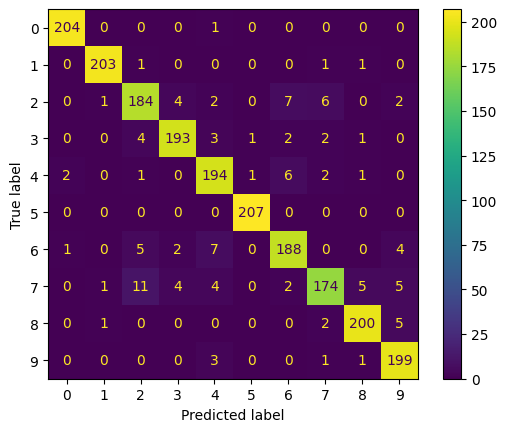


---------------------------------

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       205
           1       0.99      0.99      0.99       206
           2       0.89      0.89      0.89       206
           3       0.95      0.94      0.94       206
           4       0.91      0.94      0.92       207
           5       0.99      1.00      1.00       207
           6       0.92      0.91      0.91       207
           7       0.93      0.84      0.88       206
           8       0.96      0.96      0.96       208
           9       0.93      0.98      0.95       204

    accuracy                           0.94      2062
   macro avg       0.94      0.94      0.94      2062
weighted avg       0.94      0.94      0.94      2062



In [ ]:
#Pegue y ejecute aquí su código de la metricas usadas.

predict= mlp.predict(x_test)
cm  =confusion_matrix(y_test,predict,labels=mlp.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mlp.classes_)
disp.plot()
plt.show()
print("\n---------------------------------\n")
print(classification_report(y_test,predict))

#<font color='red'>Punto 3 (1.5). Cree un clasificador tradicional para el dataset dado, usando HOG.</font>

(1.0) Lea acerca del HOG (Histogram of Gradients) y uselo como entrada a su CLASIFICADOR TRADICIONAL, sustituyendo de esta manera a SIFT.
<font color='red'> [Nota: Solo puede cambiar el vector de entrada a su modelo.]

(0.25) De una explicación corta acerca (No más de 10 líneas) de como HOG modifica el código implementado.

(0.25) Muestre una tabla comparando las metricas obtenidas. (SIFT Vs HOG). Realice un análisis de los resultados obtenidos.

Para HOG se ha de modificar el codigo, en terminos de cambio de tamaño de las imagenes y de definicion de las caracteristicas o features obtenidas utilizando este metodo, debido a que con el Clasificador SIFT por cada imagen obteniamos un keypoint y HOG solo nos entrega los decriptores por imagenes. Adicionalemnte al construir el descriptor HOG debimos modificar parametros para ir obteniendo mejores resultados, con el descriptor SIFT no fué necesario.Al ejecturar el algoritmo se peude evidenciar como el numero de datos obtenidos con HOG aumenta con respecto SIFT, tambien se realizo un cambio en la forma en la que se obtiene los histogramas, pues con HOG se realiza por imagen y con SIFT por cada Feature por cada Imagen.

###Funciones para crear el clasificador tradcional usando HOG

In [ ]:
# re escala las imagenes par apoder utilizarlas en HOG
def resize_img(dataset):
  dataset_norm={}

  for key,value in dataset.items():
    x=[]
    for imagen in value:
      img_test = cv2.resize(imagen,(64,64))

      if img_test is not None:
        x.append(img_test)
    dataset_norm[key]=x
  return dataset_norm

#---------------------------------------------------------------------------------------
#funcion para calcular los descriptores por imagen y categoria usando HOG
def features_HOG(dataset):
  hog = cv2.HOGDescriptor(_winSize=(64, 64), _blockSize=(16,16), _blockStride=(2, 2), _cellSize=(8, 8), _nbins=9)
  feat_all = []       # Todas las características
  feat_category = {}  # Características por categoría

  for category, imgs in dataset.items():
      feat_ximg = []  # Extrae las características por cada imagen
      for img in imgs:
          desc = hog.compute(img)
          if desc is not None:
              feat_all.append(list(desc))
              feat_ximg.append(list(desc))
      feat_category[category] = feat_ximg  # Agrega las características por imagen en cada categoría

  return feat_all, feat_category


#---------------------------------------------------------------------------------------
#funciona para Clusterizar utilizando el K como entrada
def clustering2(k,lista):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(lista)
  diccionario = kmeans.cluster_centers_
  return diccionario

#---------------------------------------------------------------------------------------

#funcion para calcular el histograma de la BOVW
def img_histos_hog(bovw_feat,centers):
  dict_feat={}
  for key,value in feat_train2[1].items():
    imagens=[]
    for img in value:
      histo = np.zeros(len(diccionario_vis2))

      idx = find_idx(img,diccionario_vis2)
      histo[idx]+=1
      imagens.append(histo)
    dict_feat[key]=imagens
  return dict_feat

#---------------------------------------------------------------------------------------
#funcion para calcular la distorsion usando distancia euclidaiana y hayar el k optimo
def k_opt(lista):
  distortion=[]
  K=range(1,100,5)
  for item in K:
    kmeanmodel=KMeans(n_clusters=item,max_iter=1).fit(lista)
    distortion.append(sum(np.min(cdist(lista,kmeanmodel.cluster_centers_,'euclidean'),axis=1))/len(lista))

  return distortion

###Implemetacion

In [ ]:
#Pegue y ejecute aquí su código del entrenamiento, validación de su clasificador tradicional

Train2=resize_img(Train) #reescalado de imagenes
Test2=resize_img(Test)

feat_train2=features_HOG(Train2) #calculo de features con HOG



In [ ]:
tamaño=(np.array(feat_train2[0])).shape #determinar numero de caracteristicas por imagen

print("Se extrajeron {} características HOG de {} imágenes.".format(tamaño[1],tamaño[0]))
print("Las características SIFT se dividieron en {} categorías.".format(len(feat_train2[1]))) ## arreglar esto


Se extrajeron 22500 características HOG de 1430 imágenes.
Las características SIFT se dividieron en 10 categorías.


####K optimo

In [ ]:
'''
warnings.filterwarnings("ignore")
distorion=k_opt(feat_train2[0]) #funcion para hayar k optimo

#graficando K vs distorsion
distorion=np.array(distorion)
data=distorion.reshape(-1,1)
k=range(1,100)
plt.plot(k,data)
'''

'\nwarnings.filterwarnings("ignore")\ndistorion=k_opt(feat_train2[0]) #funcion para hayar k optimo\n\n#graficando K vs distorsion\ndistorion=np.array(distorion)\ndata=distorion.reshape(-1,1)\nk=range(1,100)\nplt.plot(k,data)\n'

####Creacion del modelo

In [ ]:
k=40
diccionario_vis2 = clustering2(k,feat_train2[0])

bovw_train2=img_histos_hog(feat_train2[1],diccionario_vis2) #bovw para datos de entrenamiento
x_train2,y_train2 =preparar_datos(bovw_train2) #preparacion de datos en arreglo numpy

imagenes={}
feat_test2 = features_HOG(Test2)#[1]  #calcular featrues con HOG para datos de validacion
bovw_test2=img_histos_hog(feat_test2[1],diccionario_vis2) #generar bovw datos de validacion
x_test2,y_test2=preparar_datos(bovw_test2) #preaprar datos de validacion en arreglo numpy

std = StandardScaler().fit(x_train2) #normalizacion
x_train2 = std.transform(x_train2)
x_test2 = std.transform(x_test2)

mlp = MLPClassifier(hidden_layer_sizes=(80,30,20),activation='relu',solver='adam',max_iter=500)
mlp.fit(x_train2,y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(80, 30, 20), max_iter=500)

### Metricas

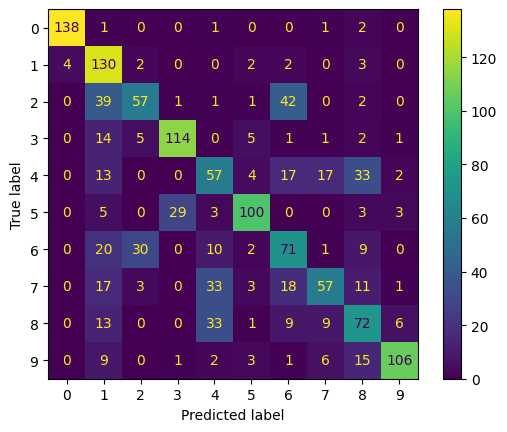


---------------------------------

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       143
           1       0.50      0.91      0.64       143
           2       0.59      0.40      0.47       143
           3       0.79      0.80      0.79       143
           4       0.41      0.40      0.40       143
           5       0.83      0.70      0.76       143
           6       0.44      0.50      0.47       143
           7       0.62      0.40      0.49       143
           8       0.47      0.50      0.49       143
           9       0.89      0.74      0.81       143

    accuracy                           0.63      1430
   macro avg       0.65      0.63      0.63      1430
weighted avg       0.65      0.63      0.63      1430



In [ ]:
#Pegue y ejecute aquí su código de la metricas usadas. Acompañelo de la tabla comparativa (SIFT vs HOG)

predict= mlp.predict(x_test2)
cm  =confusion_matrix(y_test2,predict,labels=mlp.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mlp.classes_)
disp.plot()
plt.show()
print("\n---------------------------------\n")
print(classification_report(y_test2,predict))

### Tabla comparativa (SIFT vs HOG)



<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 60%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

th {
  background-color: #f2f2f2;
}
</style>
</head>
<body>

<h2>Comparación entre Clasificador SIFT y Clasificador HOG</h2>

<table>
  <tr>
    <th>Métrica</th>
    <th>Clasificador SIFT</th>
    <th>Clasificador HOG</th>
  </tr>
  <!-- Fila de Accuracy -->
  <tr>
    <td>Accuracy</td>
    <td>0.85</td>
    <td>0.65</td>
  </tr>
  <!-- Fila de Recall -->
  <tr>
    <td>Recall</td>
    <td>0.85</td>
    <td>0.65</td>
  </tr>
  </tr>
    <tr>

</table>
</body>
</html>




La métrica Accuracy (Exactitud) indica la proporción de predicciones correctas respecto al total de predicciones. En este caso, el Clasificador SIFT tiene un valor de Accuracy más alto (0.85), lo que indica que tiene un mejor desempeño en términos de precisión general en comparación con el Clasificador HOG (0.65)

El Recall (Tasa de Verdaderos Positivos) mide la capacidad del modelo para identificar todos los ejemplos positivos. En este caso, el Clasificador SIFT tiene un valor de Recall más alto (0.85) en comparación con el Clasificador HOG (0.65), lo que sugiere que el Clasificador SIFT es mejor en la identificación de ejemplos positivos.


En resumen, en términos de Accuracy, el Clasificador SIFT muestra un rendimiento superior al Clasificador HOG. Sin embargo, ambos clasificadores tienen un Recall similar. Por lo tanto, si la precisión general es una consideración importante, el Clasificador SIFT puede ser preferible.

Es importante acalarar que el modelo utilizado para realizar las predicciones, se ajusto de acuerdo a la data obtenida en el proceso de procesamiento de datos para SIFT, utilizando una herramienta que permite evaluar  diferentes numeros de capas y parametros y esocger automaticamente el mas optimo. por esta razon podria decirse que se debe ajustar el modelo haciendo uso de la misma herramienta pero adaptandolo a el procesamiento de datos con HOG.







#<font color='red'>Punto 4 (1.0). Pruebas adicionales de su mejor Clasificador</font>.

Tome un conjunto de 20 imagenes (use camaras monoculares convencionales), mostrando diferentes digitos del lenguaje de señas. Realice un programa que permita leer las imagenes, pre-procesarlas y dejarlas listas para servir de entrada a su mejor clasificador.  Muestre las imagenes procesadas y el valor de predicción de su red con porcentaje.

In [ ]:
ruta='/content/Sign-Language-Digits-Dataset/Examples/example_1.JPG'

def load_img_process(ruta):
  img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img,(100,100))
  img = cv2.equalizeHist(img)
  img=  cv2.Laplacian(img,cv2.CV_8U)
  img = cv2.bitwise_not(img) #invierte los colores, bordes en negro fondo en blanco

  return img

In [ ]:
img=load_img_process(ruta)

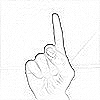

In [ ]:
cv2_imshow(img)

In [ ]:


def features_img(img):
  sift = cv2.SIFT_create()
  feat_all = []     #todas las features
  kp,desc = sift.detectAndCompute(img,None)
  return desc

feat_img=features_img(img)

In [ ]:
def find_idx(feat,center):
  count = 0
  ind = 0
  for i in range(len(center)):
    if (i==0):
      count = distance.euclidean(feat,center[i])
    else :
      dist=distance.euclidean(feat,center[i])
      if (dist<count):
        ind=i
        count=dist
  return ind


In [ ]:

def img_histos(feat_img,centers):
  imagens=[]
  histo=[]

  histo = np.zeros(len(centers))
  for each_feat in feat_img:
    idx = find_idx(each_feat,centers)
    histo[idx]+=1
  imagens.append(histo)
  return imagens


In [ ]:
bovw_img=img_histos(feat_img,diccionario_vis)
x_img=np.array(bovw_img)

#x_img= std.transform(x_img)

In [ ]:
print(mlp.predict(x_img))

ValueError: ignored

In [ ]:
porcentage=mlp.predict_proba(x_img)

ValueError: ignored

In [ ]:
porcentage.flatten()

NameError: ignored

In [ ]:
clases=mlp.classes_

In [ ]:
etiquetas=np.array(porcentage)
clases=np.array(len(clases))
plt.bar(clases,etiquetas)

NameError: ignored

In [ ]:
plt.bar(range(len(clases)),porcentage)